<a href="https://colab.research.google.com/github/RashaAlshawi/EFPN/blob/main/DataImbalance/DataAugmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import scipy.ndimage as ndi
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#CHANGE WITH YOUR DATA
X_P=np.load('/content/drive/MyDrive/VideoFrames/PositiveImageNew.npy')
y_P=np.load('/content/drive/MyDrive/VideoFrames/PositivemaskNew.npy')

In [ ]:
X_datas, y_datas = shuffle(X_P, y_P, random_state=10)

#Data augmentation should only be applied during model training, not during testing.
samples_train = int(0.80 * len(X_P))
samples_val = int(0.20 * len(y_P))

# Apply data augmentation on this
X_trainAndVal = X_datas[:samples_train]
y_trainAndVal = y_datas[:samples_train]

# Save this for testing
X_test = X_datas[samples_train:samples_train + samples_val]
y_test = y_datas[samples_train:samples_train + samples_val]

In [ ]:
# This is to apply data augmentation on each individual class
X8=np.load('/content/drive/MyDrive/VideoFrames/DS/loose_gasketImage.npy')
y8=np.load('/content/drive/MyDrive/VideoFrames/DS/loose_gasketMask.npy')

In [31]:

def elastic_deformation(image, alpha=34, sigma=4):
    """Apply elastic deformation to an image."""
    random_state = np.random.RandomState(None)

    # Create random displacement fields for x and y axes
    shape = image.shape
    dx = ndi.gaussian_filter((random_state.rand(*shape) * 2 - 1), sigma, mode="constant", cval=0)
    dy = ndi.gaussian_filter((random_state.rand(*shape) * 2 - 1), sigma, mode="constant", cval=0)

    dz = np.zeros_like(dx)  # No deformation along the z-axis (for 2D images)

    # Combine the displacement fields
    dz = np.zeros_like(dx)  # No deformation along the z-axis (for 2D images)
    def_field = np.stack((dx, dy, dz), axis=-1)

    # Apply elastic deformation to the image using the displacement field
    deformed_image = ndi.map_coordinates(image, def_field.transpose(2, 0, 1), order=1, mode='reflect')

    return deformed_image

In [70]:
import cv2
import numpy as np

def augment_data(images, labels):
    augmented_images = []
    augmented_labels = []

    # Ensure images are in uint8 format and channels are in the correct order
    images = np.uint8(images)
    labels = np.uint8(labels)

    for image, label in zip(images, labels):
        # Horizontal Flip
        augmented_image = cv2.flip(image, 1)  # 1 for horizontal flip
        augmented_label = cv2.flip(label, 1)  # 1 for horizontal flip
        augmented_images.append(augmented_image)
        augmented_labels.append(augmented_label)


        # Gaussian Blur
        blurred_image = cv2.GaussianBlur(image, (5, 5), 0)  # Kernel size (5, 5)
        augmented_images.append(blurred_image)
        augmented_labels.append(label)  # No change to label for Gaussian blur

        # Color Jittering
        brightness = np.random.uniform(0.5, 1.5)  # Random brightness factor
        contrast = np.random.uniform(0.5, 1.5)    # Random contrast factor
        saturation = np.random.uniform(0.5, 1.5)  # Random saturation factor
        hue = np.random.uniform(-0.1, 0.1)       # Random hue shift
        hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
        hsv_image = np.array(hsv_image, dtype=np.float64)
        hsv_image[:, :, 2] *= brightness
        hsv_image[:, :, 1] *= contrast
        hsv_image[:, :, 1] = np.clip(hsv_image[:, :, 1], 0, 255)
        hsv_image[:, :, 1] *= saturation
        hsv_image[:, :, 1] = np.clip(hsv_image[:, :, 1], 0, 255)
        hsv_image[:, :, 0] += hue * 180
        hsv_image[:, :, 0] = np.clip(hsv_image[:, :, 0], 0, 180)
        image = np.array(hsv_image, dtype=np.uint8)
        augmented_images.append(image)
        augmented_labels.append(label)  # No change to label for color jittering
             # Shearing
        shear_factor = 0.2  # Shear factor
        shear_matrix = np.array([[1, shear_factor, 0], [0, 1, 0]])
        sheared_image = cv2.warpAffine(image, shear_matrix, (image.shape[1], image.shape[0]))
        sheared_label = cv2.warpAffine(label, shear_matrix, (label.shape[1], label.shape[0]))
        augmented_images.append(sheared_image)
        augmented_labels.append(sheared_label)

        # Rotate
        rotation_angle = 30  # in degrees
        rotation_matrix = cv2.getRotationMatrix2D((image.shape[1] / 2, image.shape[0] / 2), rotation_angle, 1)
        rotated_image = cv2.warpAffine(image, rotation_matrix, (image.shape[1], image.shape[0]))
        rotated_label = cv2.warpAffine(label, rotation_matrix, (label.shape[1], label.shape[0]))
        augmented_images.append(rotated_image)
        augmented_labels.append(rotated_label)


    # Rotate
        rotation_angle1 = 50  # in degrees
        rotation_matrix = cv2.getRotationMatrix2D((image.shape[1] / 2, image.shape[0] / 2), rotation_angle1, 1)
        rotated_image1 = cv2.warpAffine(image, rotation_matrix, (image.shape[1], image.shape[0]))
        rotated_label1= cv2.warpAffine(label, rotation_matrix, (label.shape[1], label.shape[0]))
        augmented_images.append(rotated_image1)
        augmented_labels.append(rotated_label1)

  # Random Noise 2
        mean1 = 0
        stddev1 = 60  # Adjust standard deviation as needed
        noise1 = np.random.normal(mean1, stddev1, image.shape).astype(np.uint8)
        noisy_image1 = cv2.add(image, noise1)
        augmented_images.append(noisy_image1)
        augmented_labels.append(label)  # No change to label for random noise



        # Random Crop
        crop_height, crop_width = 100, 100  # Adjust crop size as needed
        y_start = np.random.randint(0, image.shape[0] - crop_height)
        x_start = np.random.randint(0, image.shape[1] - crop_width)
        cropped_image = image[y_start:y_start+crop_height, x_start:x_start+crop_width]
        cropped_label = label[y_start:y_start+crop_height, x_start:x_start+crop_width]
        cropped_image = cv2.resize(cropped_image, (image.shape[1], image.shape[0]))  # Resize cropped image to match original size
        cropped_label = cv2.resize(cropped_label, (label.shape[1], label.shape[0]))  # Resize cropped label to match original size
        augmented_images.append(cropped_image)
        augmented_labels.append(cropped_label)


        # Random Noise
        mean = 0
        stddev = 20  # Adjust standard deviation as needed
        noise = np.random.normal(mean, stddev, image.shape).astype(np.uint8)
        noisy_image = cv2.add(image, noise)
        augmented_images.append(noisy_image)
        augmented_labels.append(label)  # No change to label for random noise



    return np.array(augmented_images), np.array(augmented_labels)

In [56]:
# For classes with high samples

def augment_data(images, labels):
    augmented_images = []
    augmented_labels = []

    # Ensure images are in uint8 format and channels are in the correct order
    images = np.uint8(images)
    labels = np.uint8(labels)

    for image, label in zip(images, labels):
        # Horizontal Flip
        augmented_image = cv2.flip(image, 1)  # 1 for horizontal flip
        augmented_label = cv2.flip(label, 1)  # 1 for horizontal flip
        augmented_images.append(augmented_image)
        augmented_labels.append(augmented_label)

        # Color Jittering
        brightness = np.random.uniform(0.5, 1.5)  # Random brightness factor
        contrast = np.random.uniform(0.5, 1.5)    # Random contrast factor
        saturation = np.random.uniform(0.5, 1.5)  # Random saturation factor
        hue = np.random.uniform(-0.1, 0.1)       # Random hue shift
        hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
        hsv_image = np.array(hsv_image, dtype=np.float64)
        hsv_image[:, :, 2] *= brightness
        hsv_image[:, :, 1] *= contrast
        hsv_image[:, :, 1] = np.clip(hsv_image[:, :, 1], 0, 255)
        hsv_image[:, :, 1] *= saturation
        hsv_image[:, :, 1] = np.clip(hsv_image[:, :, 1], 0, 255)
        hsv_image[:, :, 0] += hue * 180
        hsv_image[:, :, 0] = np.clip(hsv_image[:, :, 0], 0, 180)
        image = np.array(hsv_image, dtype=np.uint8)
        augmented_images.append(image)
        augmented_labels.append(label)  # No change to label for color jittering
             # Shearing
        shear_factor = 0.2  # Shear factor
        shear_matrix = np.array([[1, shear_factor, 0], [0, 1, 0]])
        sheared_image = cv2.warpAffine(image, shear_matrix, (image.shape[1], image.shape[0]))
        sheared_label = cv2.warpAffine(label, shear_matrix, (label.shape[1], label.shape[0]))
        augmented_images.append(sheared_image)
        augmented_labels.append(sheared_label)

        # Rotate
        rotation_angle = 30  # in degrees
        rotation_matrix = cv2.getRotationMatrix2D((image.shape[1] / 2, image.shape[0] / 2), rotation_angle, 1)
        rotated_image = cv2.warpAffine(image, rotation_matrix, (image.shape[1], image.shape[0]))
        rotated_label = cv2.warpAffine(label, rotation_matrix, (label.shape[1], label.shape[0]))
        augmented_images.append(rotated_image)
        augmented_labels.append(rotated_label)


    return np.array(augmented_images), np.array(augmented_labels)

In [92]:
augmented_images, augmented_labels = augment_data(X8, y8)

In [93]:
augmented_images.shape, augmented_labels.shape, X8.shape, y8.shape

((936, 128, 128, 3), (936, 128, 128), (104, 128, 128, 3), (104, 128, 128))

In [94]:
np.unique(y8), np.unique(augmented_labels)


(array([0, 8], dtype=uint8), array([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype=uint8))

In [95]:
# To make sure the classes are not chnages during adding noise
class_mapping = { 0: 0, 1: 8, 2:8 ,3:8, 4:8,5:8, 6:8,7:8,8:8}
map_labels = np.vectorize(lambda label: class_mapping[label])

In [96]:
augmented_labels_=map_labels(augmented_labels)

In [97]:
np.unique(augmented_labels_)

array([0, 8])

In [98]:
# Save
path='/content/drive/MyDrive/VideoFrames/DS/efpn_DecAug/'
np.save(path+'augmented_loose_gasketX',augmented_images)
np.save(path+'augmented_loose_gaskety',augmented_labels_)

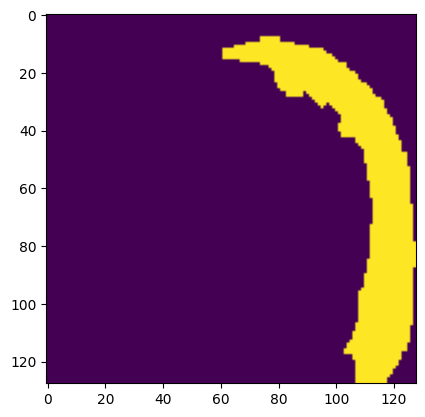

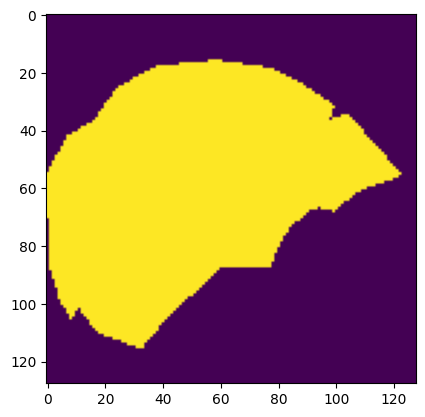

In [89]:
plt.imshow(augmented_labels_[43])
plt.show()
plt.imshow(y6[43])
plt.show()